# Coffee Shop Prices analysis

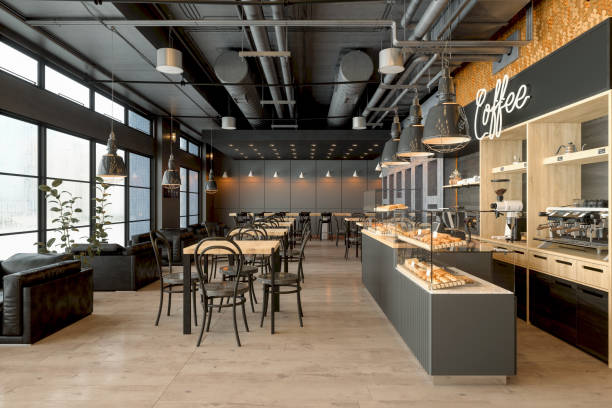

## Objective
- Clean and analyze the provided dataset to determine the profitability of products/services.
- Identify strategies to increase profit margins or mitigate losses based on the analysis.

**Cleaning Data**

To enhance my data science skills this time I used excel and power Bi to clean the data and creating dashboards. In my previous project which is about House price Analysis I used Python for this purpose.I use Microsoft excel 2016 to remove duplicates and null values, all thed ata is fine there is no duplicates and null values.


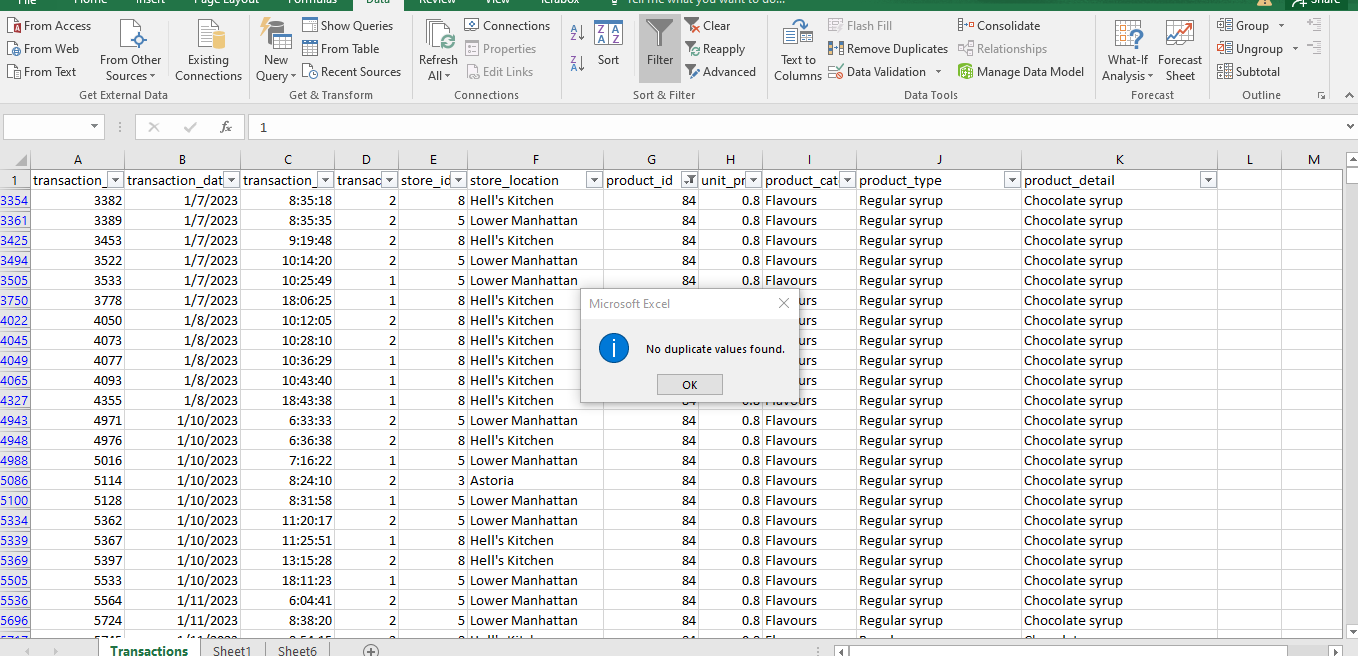


**After cleaning data I used python to explore the data for the predictve modelling.**

In [44]:
import numpy as np
import pandas as pd
data = pd.read_excel('Coffee Shop Sales.xlsx')

In [45]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [46]:
# Get the number of rows and columns
data.shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 7
Number of columns: 2


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [48]:
# Check the column names to identify the target variable
print(data.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')


In [49]:
# Get data types
print(data.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object


In [50]:
data.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


## Profit Loss Analysis

- Compare the products sales in a graphical representation.
- Identify products/services generating profit and those incurring losses.

I use Power BI to find these outcomes compare data and create diffferent grapgh to unserstand the data and find the prices of each product offered by coffee shops to view there prices and the profit they earn and which product is more costly and which is less costly.

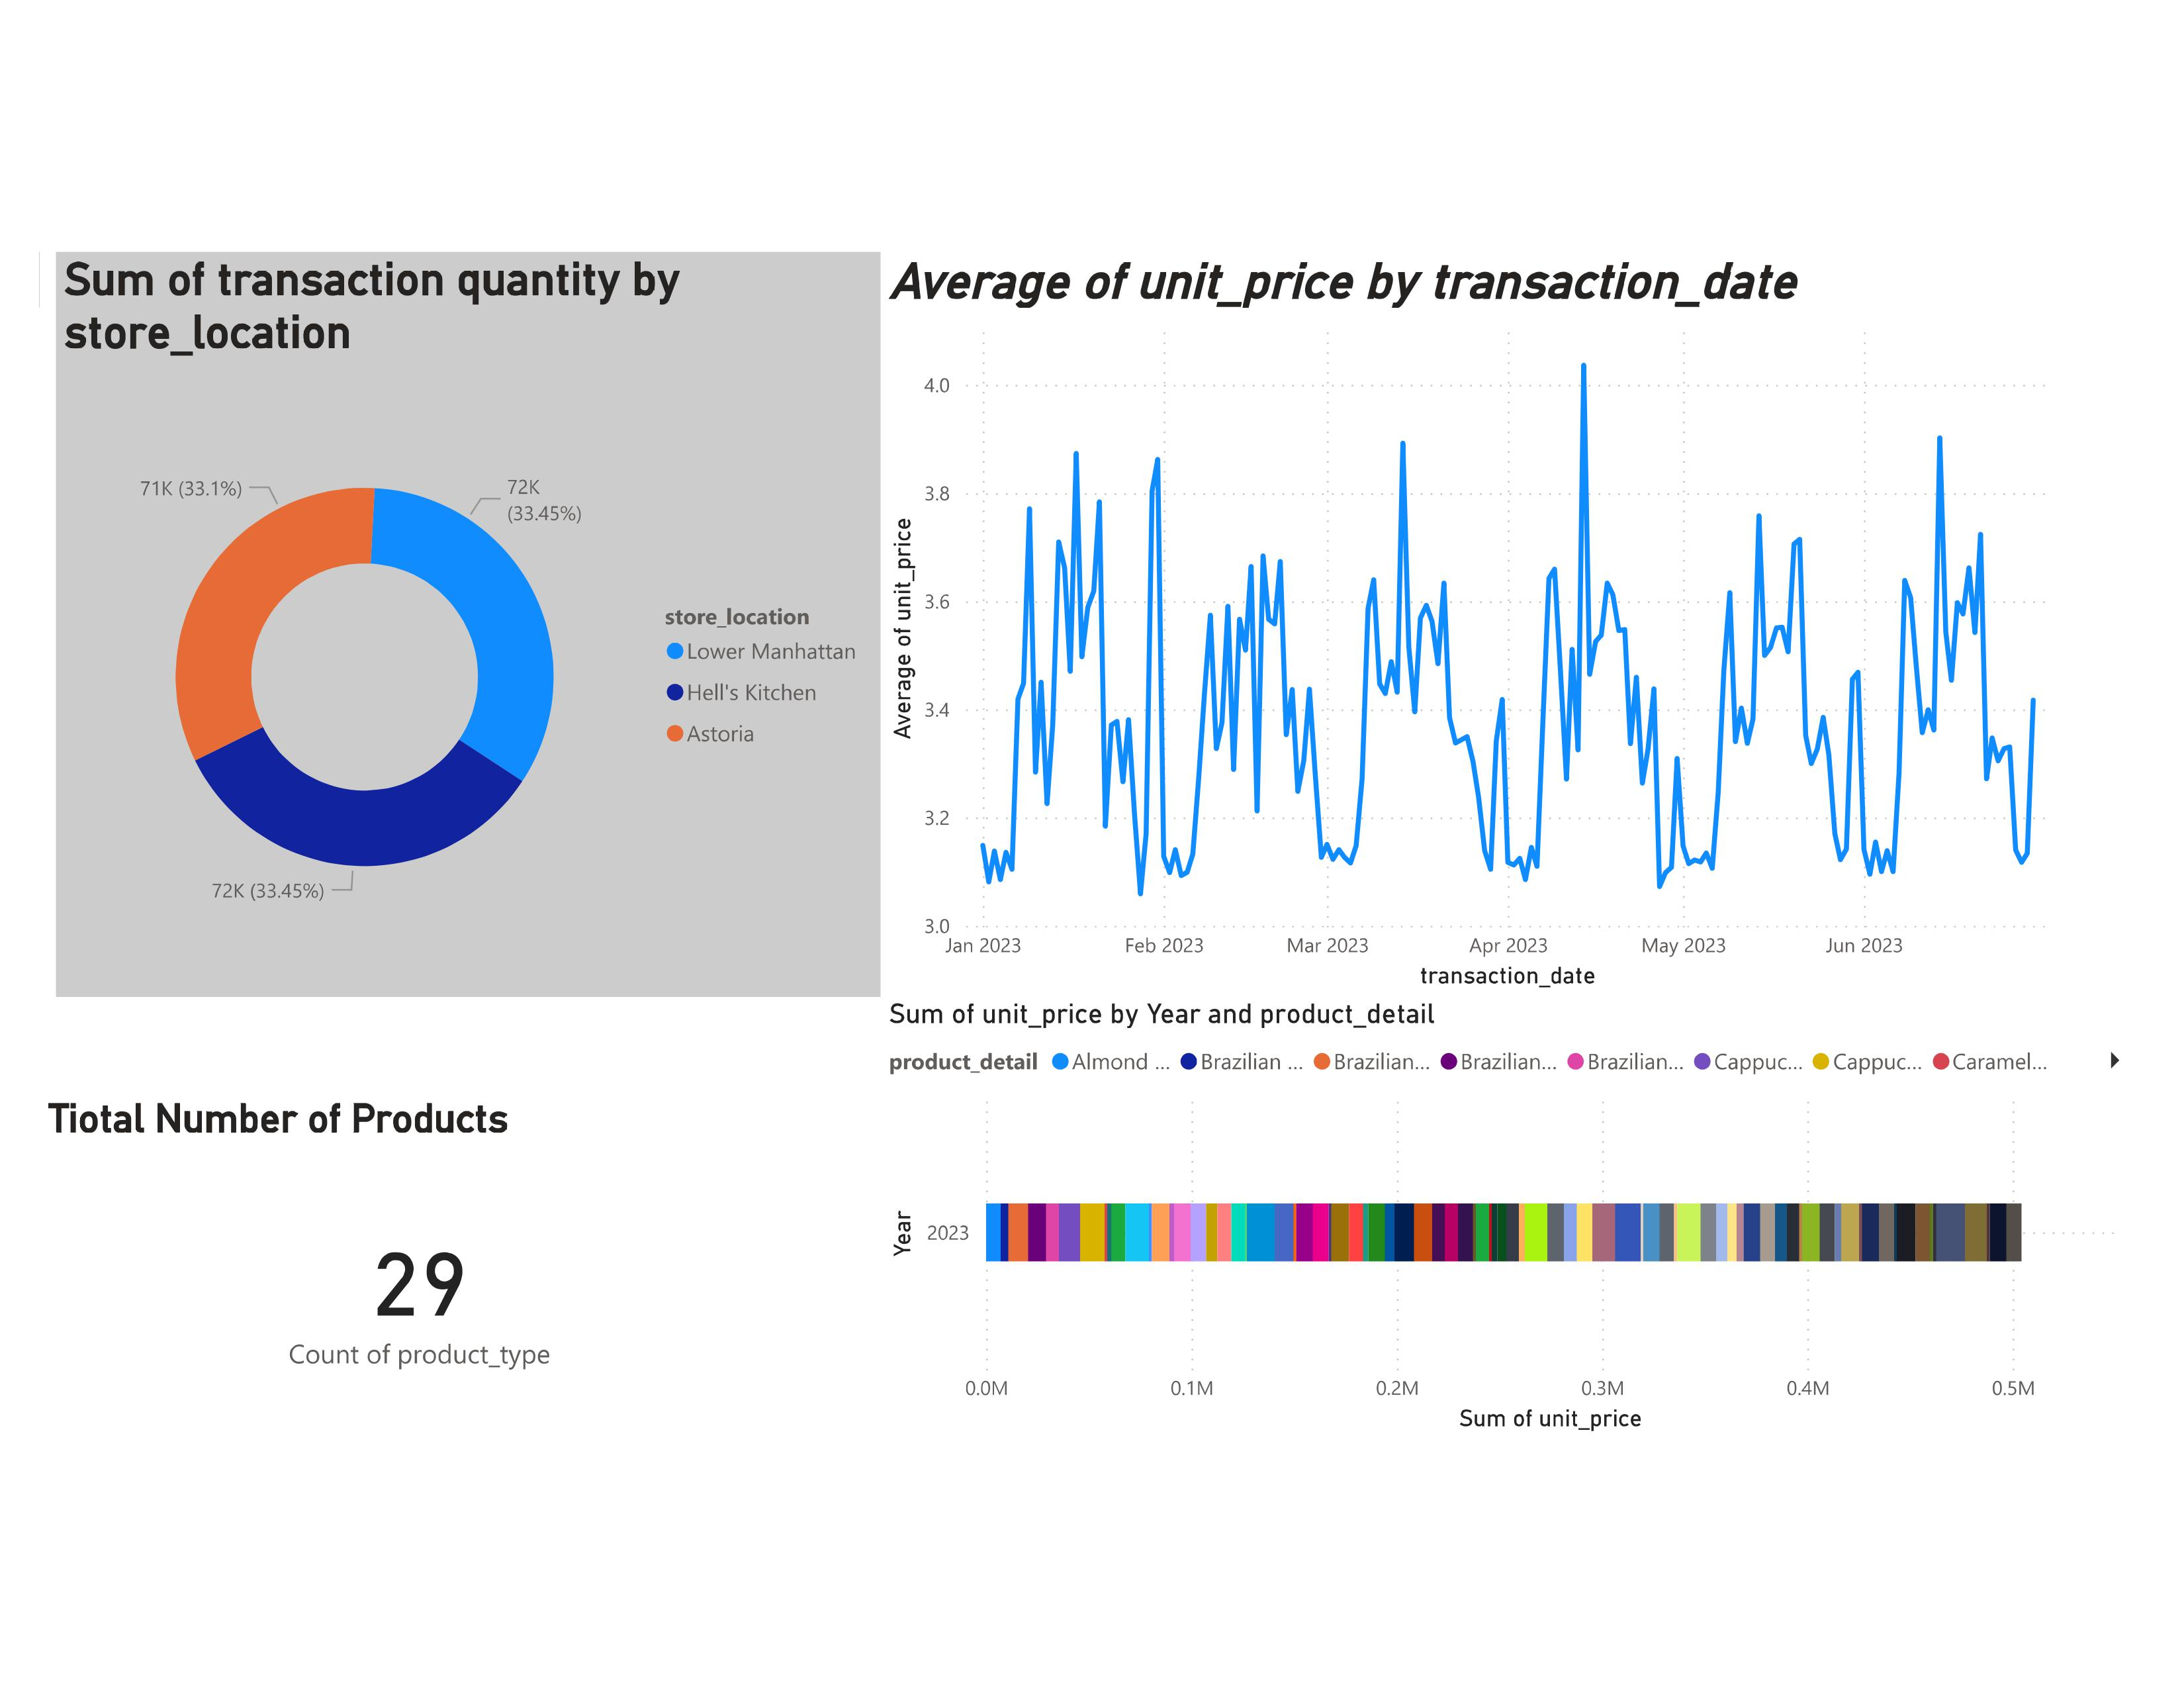

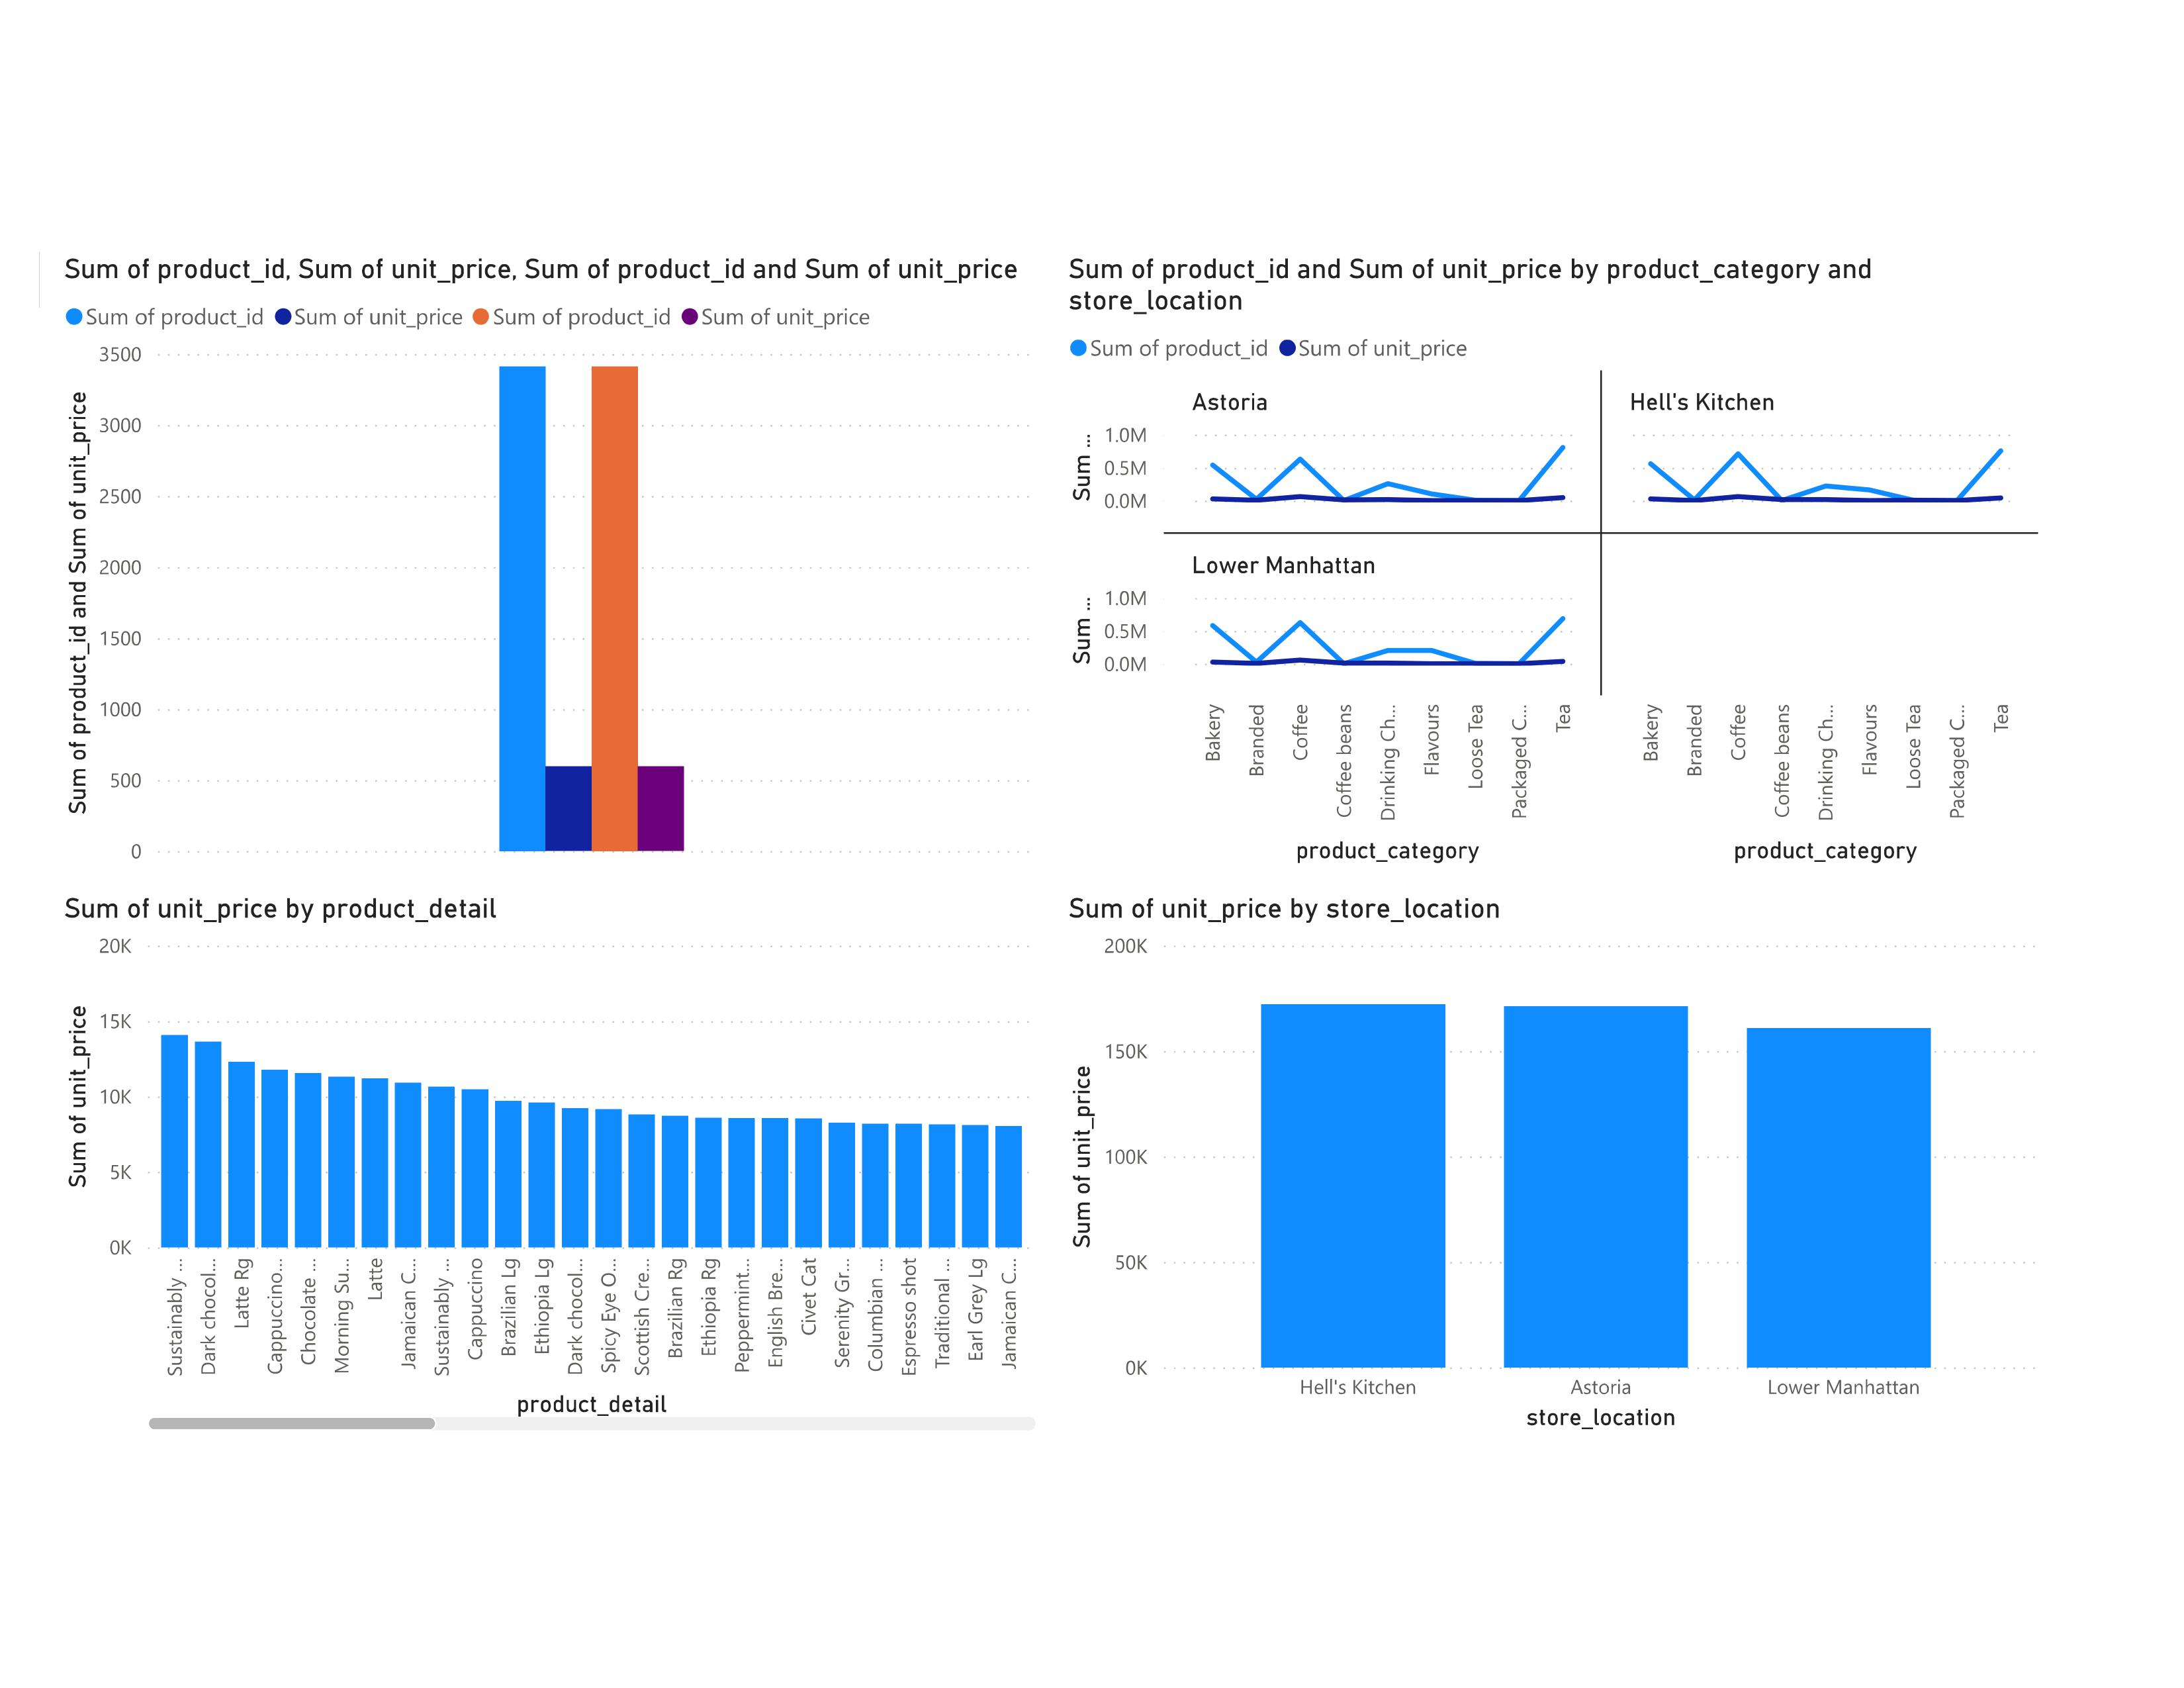

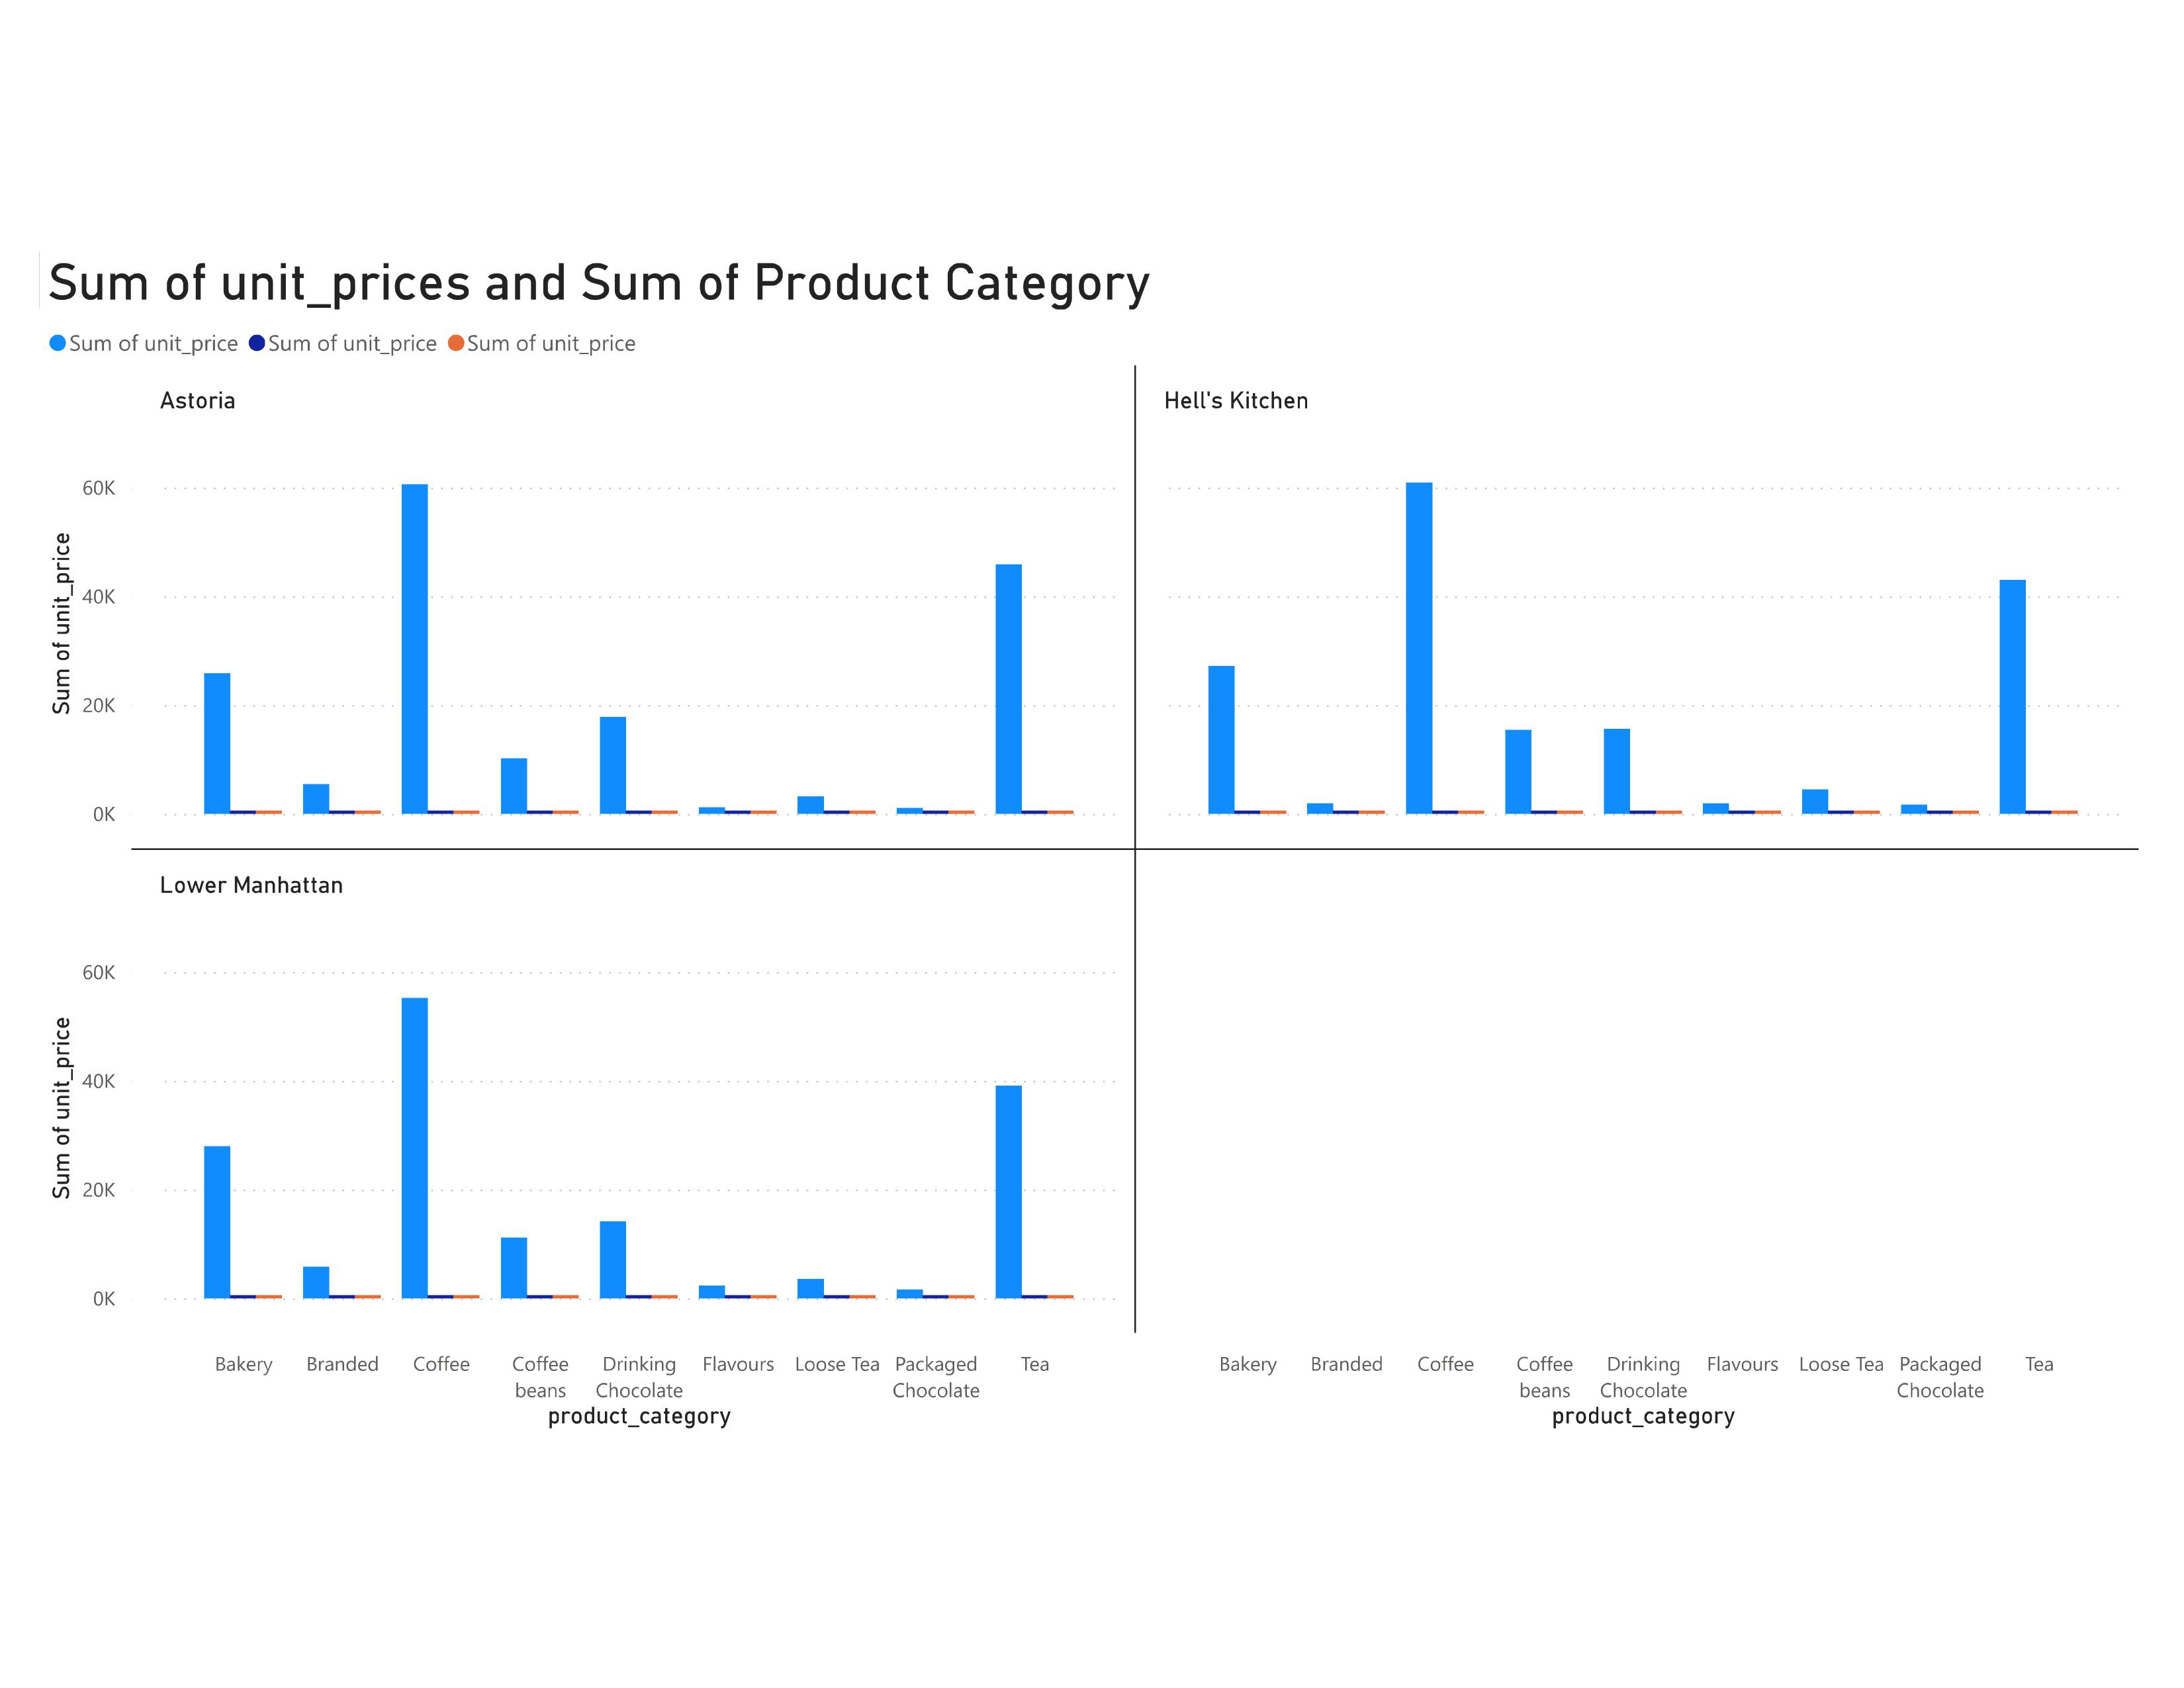

## Feature Engineering

In [51]:
# use laberencoder to convert data in ordinal form

df=data.astype('category')


In [52]:
data.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [53]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
for column in df.columns:
    df[column]=LabelEncoder.fit_transform(df[column])

In [54]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,0,0,1156,1,1,2,31,8,2,13,32
1,1,0,1256,1,1,2,56,9,8,4,71
2,2,0,1435,1,1,2,58,17,4,17,20
3,3,0,1656,0,1,2,21,1,2,10,60
4,4,0,1731,1,1,2,56,9,8,4,71


## Predictive Modeling for Forecasting Future Profits

In [55]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
#Since we need to calculate profit for that purpose we need to calculate total revenue of shops
# Calculate revenue
data['Revenue'] = data['transaction_qty'] * data['unit_price']

In [57]:
# Convert categorical variables to dummy variables (One-Hot Encoding)
data_encoded = pd.get_dummies(data, columns=['store_location', 'product_category', 'product_type', 'product_detail'])

In [58]:
# Features and target
X = data_encoded.drop(['Revenue', 'transaction_id', 'transaction_date', 'transaction_time'], axis=1)
y = data_encoded['Revenue']

In [59]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R²: {r2_score(y_test, y_pred)}')

RMSE: 0.0026636360640194616
R²: 0.9999992239745907


## Exploring Factors Contributing to Profitability

In [60]:
# Feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)

transaction_qty                                0.630528
unit_price                                     0.345777
product_detail_Civet Cat                       0.022069
product_id                                     0.001135
product_category_Coffee                        0.000078
                                                 ...   
product_detail_Oatmeal Scone                   0.000000
product_detail_Sustainably Grown Organic Rg    0.000000
product_category_Flavours                      0.000000
product_detail_Dark chocolate                  0.000000
product_detail_Our Old Time Diner Blend        0.000000
Length: 125, dtype: float64


In [61]:
# Example recommendation based on feature importance
top_factors = feature_importance.head(10)
print("Top factors contributing to profit:", top_factors.index.tolist())

Top factors contributing to profit: ['transaction_qty', 'unit_price', 'product_detail_Civet Cat', 'product_id', 'product_category_Coffee', 'product_type_Barista Espresso', 'product_detail_Sustainably Grown Organic Lg', 'product_detail_I Need My Bean! Diner mug', 'product_detail_Morning Sunrise Chai Lg', 'product_category_Coffee beans']


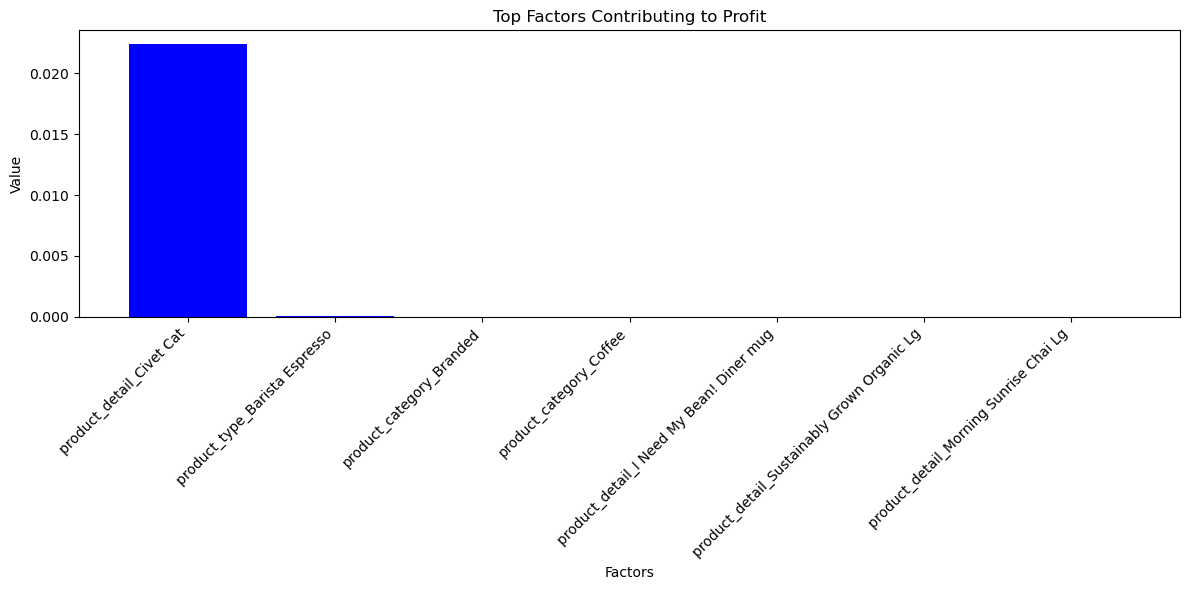

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'product_detail_Civet Cat': 0.022423,
    'product_type_Barista Espresso': 0.000083,
    'product_category_Branded': 0.000000,
    'product_category_Coffee': 0.000000,
    'product_detail_I Need My Bean! Diner mug': 0.000000,
    'product_detail_Sustainably Grown Organic Lg': 0.000000,
    'product_detail_Morning Sunrise Chai Lg': 0.000000
}

# Convert to DataFrame for plotting
df = pd.DataFrame(list(data.items()), columns=['Factor', 'Value'])

# Sort DataFrame by Value for better visualization
df = df.sort_values(by='Value', ascending=False)

# Create a histogram plot (bar plot)
plt.figure(figsize=(12, 6))
plt.bar(df['Factor'], df['Value'], color='b')

# Add title and labels
plt.title('Top Factors Contributing to Profit')
plt.xlabel('Factors')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right') 

# Show the plot
plt.tight_layout()
plt.show()



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of profit by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_id', y='profit', data=data)
plt.xticks(rotation=45)
plt.title('Profit by Product Category')
plt.show()


NameError: name 'data' is not defined

<Figure size 1200x600 with 0 Axes>

## Loss Mitgation Predictive Model

**Label Creation:**

Create a binary label indicating whether a product or service is a loss-maker. 

In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
# Calculate total revenue per transaction
data['total_revenue'] = data['transaction_qty'] * data['unit_price']
# Aggregate data at the product level
product_data = data.groupby('product_id').agg({
    'total_revenue': 'sum',
    'transaction_qty': 'sum',
    'unit_price': 'mean',
    'transaction_id': 'count'
}).reset_index()

# Define a loss threshold 
loss_threshold = product_data['total_revenue'].quantile(0.25) 
product_data['is_loss_making'] = product_data['total_revenue'] < loss_threshold

# Check the resulting data
print(product_data.head())


   product_id  total_revenue  transaction_qty  unit_price  transaction_id  \
0           1        3852.00              214       18.00             209   
1           2        3294.00              183       18.00             183   
2           3        2492.75              169       14.75             169   
3           4        3067.50              150       20.45             150   
4           5        2220.00              148       15.00             148   

   is_loss_making  
0           False  
1           False  
2            True  
3           False  
4            True  


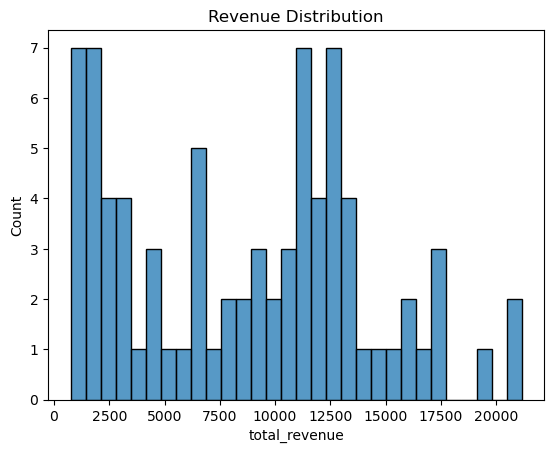

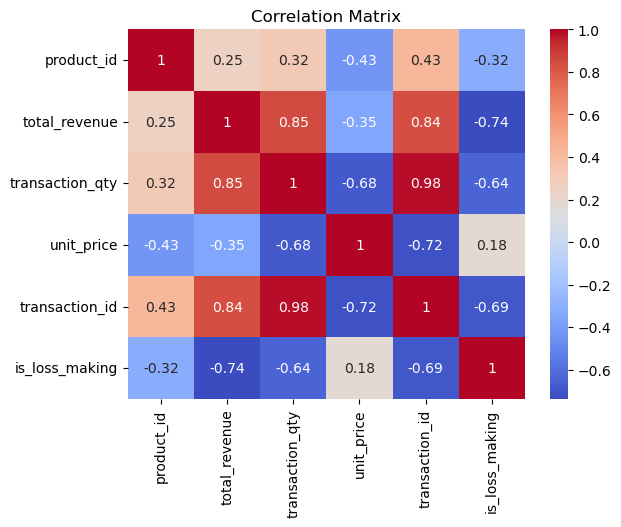

In [ ]:
# Plot distribution of total revenue
sns.histplot(product_data['total_revenue'], bins=30)
plt.title('Revenue Distribution')
plt.show()

# Correlation matrix
correlation = product_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Modelling:

In [ ]:


from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = product_data.drop(['is_loss_making', 'product_id'], axis=1)
y = product_data['is_loss_making']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



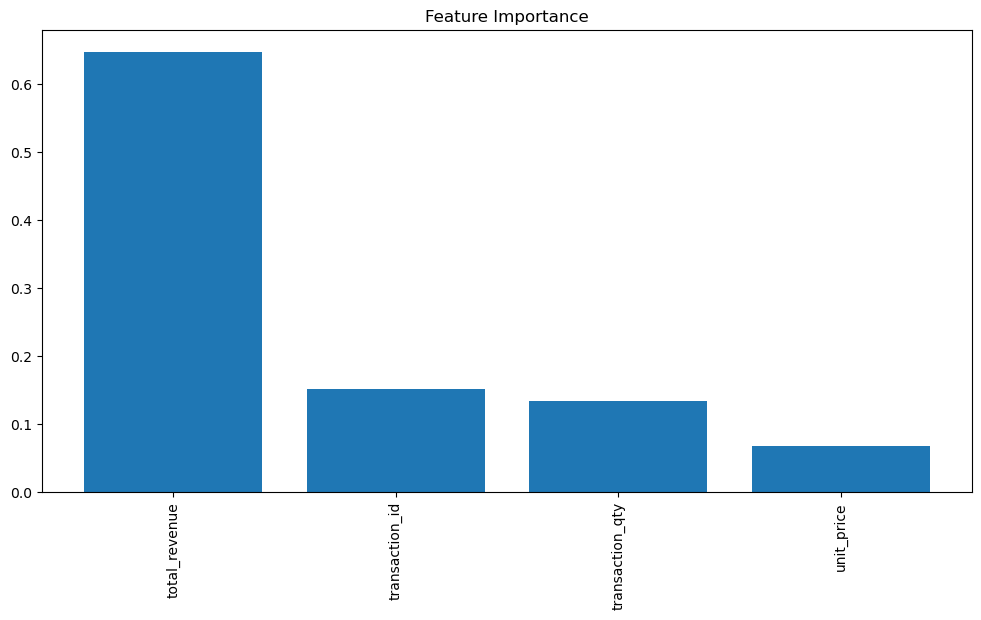

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.show()
